## Homework 2 - Raul G. Martinez (PID: A12461871)

## DSE 220: Machine Learning 

## Due Date: 30 April 2020, 11:59 PM 

### 1. Instructions

The answers should be submitted on Gradescope. You should submit the PDF of the jupyter notebook and also submit a zip of the notebook with any additional files needed to run the notebook. Please make sure that the questions are clearly segmented and labeled. To secure full marks for a question both the answer and the code should be correct. Completely wrong (or missing) code with correct answer will result in zero marks. Please complete this homework individually.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# import sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_breast_cancer, load_digits, load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2. Dataset for Section 3

Download the ‘wine’ (train, validation and test) data from Canvas (hw1.zip). Use this data for the the k-Nearest Neighbours problems.

Download from: Canvas/Files/Lecture1/hw1.zip

In [2]:
# read wine train, validation, and test data
X_train = pd.read_csv('wine_train_data.csv')
X_val = pd.read_csv('wine_val_data.csv')
X_test = pd.read_csv('wine_test_data.csv')

y_train = pd.read_csv('wine_train_labels.csv')
y_val = pd.read_csv('wine_val_labels.csv')
y_test = pd.read_csv('wine_test_labels.csv')

### 3. k-Nearest Neighbours

Normalize Data: Normalize features such that for each feature the mean is 0 and the standard deviation is 1 in the train+validation data. Use the normal- izing factors calculated on train+validation data to modify the values in train, validation and test data.

In [3]:
# create the train+validation data
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# find mean and standard deviation of train+validation features
mu_train_val = X_train_val.mean(axis = 0)
std_train_val = X_train_val.std(axis = 0)

In [4]:
# normalize train, validation, and test data with mu and std found on train+validation
"""
Formula: 
X_normalized = (X_i - mu)/std, for each feature
"""
X_trainNorm = X_train.apply(lambda x: (x-mu_train_val)/std_train_val, axis = 1)
X_valNorm = X_val.apply(lambda x: (x-mu_train_val)/std_train_val, axis = 1)
X_testNorm = X_test.apply(lambda x: (x-mu_train_val)/std_train_val, axis = 1)

# also normalize the train+val data
X_train_val_Norm = X_train_val.apply(lambda x: (x-mu_train_val)/std_train_val, axis = 1)

#### Question 1: Train k-nn model on train + validation data and report accuracy on test data. Use Euclidean distance and k=3. (1 mark)

In [5]:
# create k-nn model and train on train+validation norm
clf = KNeighborsClassifier(n_neighbors = 3, p = 2) # p = 2 is for the eucledian distance (L2)
clf.fit(X_train_val_Norm, y_train_val['class']) 

# report accuracy on test norm data
predictions = clf.predict(X_testNorm)
print ('accuracy on test norm data = ' + str(np.sum(predictions == y_test['class'])/(len(y_test['class']))))

accuracy on test norm data = 0.8717948717948718


#### Question 2: Train the model on train data for distance metrics defined by l1, linf, l2. Report the accuracies on the validation data. Select the best metric and report the accuracy on the test data for the selected metric. Use k=3. (1 mark)

In [6]:
# train model with train data for different distance metrics and report accuracies on val data

# define metrics for distance norms
dist_metrics = ['manhattan', 'euclidean', 'chebyshev'] # l1, l2, and linf
L = ['l1', 'l2', 'linf']

# loop over each norm
for d, L in zip(dist_metrics, L):
    
    # create model and train, on train norm data
    clf = KNeighborsClassifier(n_neighbors = 3, metric = d)
    clf.fit(X_trainNorm, y_train['class']) 
    
    # report accuracy on validation norm data
    predictions = clf.predict(X_valNorm)
    print('norm: {}, distance metric: {}'.format(L, d))
    print ('\taccuracy on val norm data = ' + str(np.sum(predictions == y_val['class'])/(len(y_val['class']))))

norm: l1, distance metric: manhattan
	accuracy on val norm data = 0.9487179487179487
norm: l2, distance metric: euclidean
	accuracy on val norm data = 0.9230769230769231
norm: linf, distance metric: chebyshev
	accuracy on val norm data = 0.9230769230769231


In [7]:
# best metric is l1 norm with manhattan metric, now report accuracy on test data
 
# create model and train, on train+validation norm
clf = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan')
clf.fit(X_train_val_Norm, y_train_val['class']) 

# report accuracy on test norm data
predictions = clf.predict(X_testNorm)
print('norm: {}, distance metric: {}'.format('l1', 'manhattan'))
print ('\taccuracy on test norm data = ' + str(np.sum(predictions == y_test['class'])/(len(y_test['class']))))

norm: l1, distance metric: manhattan
	accuracy on test norm data = 0.9743589743589743


#### Question 3: Train the k-nn model on train data for k=1,3,5,7,9. Report and plot the accuracies on the validation data. Select the best ’k’ value and report the accuracy on the test data for the selected ’k’. Use Euclidean distance. (2 marks)

In [8]:
# train model with train data for different values of k and report accuracies on val data

# loop over each value of k
accuracy_list = []
k_values = [1, 3, 5, 7, 9] 
for k in k_values:
    
    # create model and train, on train norm data
    clf = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    clf.fit(X_trainNorm, y_train['class']) 
    
    # report accuracy on validation norm data
    predictions = clf.predict(X_valNorm)
    print('k-value: {}, distance metric: {}'.format(k, 'euclidean'))
    accuracy = np.sum(predictions == y_val['class'])/(len(y_val['class']))
    print ('\taccuracy on val norm data = ' + str(accuracy))
    
    # save k value and accuracy for plotting
    accuracy_list.append(accuracy)

k-value: 1, distance metric: euclidean
	accuracy on val norm data = 0.9487179487179487
k-value: 3, distance metric: euclidean
	accuracy on val norm data = 0.9230769230769231
k-value: 5, distance metric: euclidean
	accuracy on val norm data = 0.9487179487179487
k-value: 7, distance metric: euclidean
	accuracy on val norm data = 0.9743589743589743
k-value: 9, distance metric: euclidean
	accuracy on val norm data = 0.9487179487179487


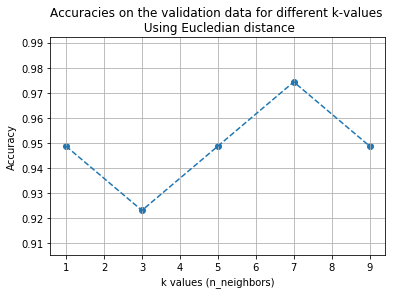

In [9]:
# plot the accuracies on the validation data
plt.scatter(k_values, accuracy_list)
plt.plot(k_values, accuracy_list, '--')
plt.title('Accuracies on the validation data for different k-values \n Using Eucledian distance')
plt.xlabel('k values (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [10]:
# best metric is k-value = 7, now report accuracy on test data
 
# create model and train, on train+validation norm
clf = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
clf.fit(X_train_val_Norm, y_train_val['class']) 

# report accuracy on test norm data
predictions = clf.predict(X_testNorm)
print('k-value: {}, distance metric: {}'.format(7, 'euclidean'))
print ('\taccuracy on test norm data = ' + str(np.sum(predictions == y_test['class'])/(len(y_test['class']))))

k-value: 7, distance metric: euclidean
	accuracy on test norm data = 0.9230769230769231


### 4. Data

Download the MNIST train and test data from Canvas (hw2 SP20.zip) along with their corresponding label files. The train and test data consist of 6000 and 1000 binarized MNIST images respectively.

Download from: Canvas/Files/Lecture2/hw2 SP20.zip

In [11]:
# MNIST train and test data
X_train = pd.read_csv('mnist_train_data.csv', header=None)
X_test = pd.read_csv('mnist_test_data.csv', header=None)

y_train = pd.read_csv('mnist_train_labels.csv', header=None)
y_test = pd.read_csv('mnist_test_labels.csv', header=None)

In [12]:
print('Number of features: {}'.format(X_train.shape[1]))
print('Number of labels: {}'.format(len(set(y_train.iloc[:,0]))))

Number of features: 784
Number of labels: 10


### 5. Generative Learning

Please don’t use the direct function from scikit-learn library for ques- tions 4, 5, 6 and write your own implementation for them.

#### Question 4: Compute and report the prior probabilities πj for all labels. (10 marks)

In [13]:
# define dictionary for pi_j where j is each label 0,1,2,...,9
pi_j = {k:v for (k, v) in zip(range(10), [0]*10)}
    
# count ocurrences for each label j in the train data 
for j in y_train.iloc[:,0]:
    pi_j[j]+=1
    
# divide each label count by the total number of entries
for j in pi_j.keys():
    pi_j[j]/=len(y_train)
    
# print prior probabilities
print('Prior probabilities for each label 0,1,2,...,9')  
print(pi_j)

Prior probabilities for each label 0,1,2,...,9
{0: 0.09866666666666667, 1: 0.11183333333333334, 2: 0.09683333333333333, 3: 0.10133333333333333, 4: 0.10383333333333333, 5: 0.08566666666666667, 6: 0.10133333333333333, 7: 0.1085, 8: 0.09183333333333334, 9: 0.10016666666666667}


#### Question 5: For each pixel Xi and label j, compute Pji = P(Xi = 1|y = j) (Use the maximum likelihood estimate shown in class). Use Laplacian Smoothing for computing Pji. Report the highest Pji for each label j. (15 marks)

In [14]:
# find the number of instances of class j
n_j = {k:v for (k, v) in zip(range(10), [0]*10)}
for j in y_train.iloc[:,0]:
    n_j[j]+=1

# loop over every j
P_ji = {k:v for (k, v) in zip(range(10), [0]*10)}
for j, num_j in n_j.items():
    
    # only leave x train data for label j
    X_train_j = X_train.iloc[y_train[0][y_train[0]==j].index]
    
    # find the number of instance of class j with Xi = 1
    n_ji = np.sum(X_train_j == 1, axis=0)

    # use laplace smoothing to compute P_ji = Pr(Xi = 1| y = j)
    P_ji[j] = [(num_ji + 1)/(num_j + 2) for num_ji in n_ji]

# report highest P_ji for each label j
print('Highest P_ji for each label j')
{k:max(v) for (k,v) in P_ji.items()}

Highest P_ji for each label j


{0: 0.8518518518518519,
 1: 0.9851411589895989,
 2: 0.7289879931389366,
 3: 0.8081967213114755,
 4: 0.8496,
 5: 0.7112403100775194,
 6: 0.8491803278688524,
 7: 0.7947932618683001,
 8: 0.8752260397830018,
 9: 0.867330016583748}

#### Question 6: Use naive bayes (as shown in lecture slides) to classify the test data. Report the accuracy. (5 marks)

Note: You can use the scikit-learn functions from Question 7 onwards

In [15]:
# use naive bayes to classify test data
y_pred = []
for img_idx in range(len(X_test)): # 0 --> 999
    
    # find the argmax of j for every image
    list_ = []
    for label in range(10):
        
        # get binomial array for each image
        curr_img = X_test.iloc[img_idx]
        
        # calculate sum from terms for 0 and 1
        term_x1 = curr_img * np.log(P_ji[label])
        term_x0 = [1-n for n in curr_img] * np.log([1-n for n in P_ji[label]])
        sum_ = sum(term_x1 + term_x0)
        
        # create temporal list where argmax is found
        list_.append(np.log(pi_j[label]) + sum_)
    
    # classify each label
    y_pred.append(list_.index(max(list_)))

print('Using naive bayes equations from lecture slides')
print ('accuracy on test data = ' + str(np.sum(y_pred == y_test[0])/(len(y_test[0]))))

Using naive bayes equations from lecture slides
accuracy on test data = 0.809


In [16]:
# compare answer with scikit-learn Multinomial NB
clf = MultinomialNB()
clf.fit(X_train, y_train[0])
predicted = clf.predict(X_test)

print('Using scikit-learn Multinomial NB')
print ('accuracy on test data = ' + str(np.sum(predicted == y_test[0])/(len(y_test[0]))))

Using scikit-learn Multinomial NB
accuracy on test data = 0.799


#### Question 7: Compute the confusion matrix (as shown in the lectures) and report the top 3 pairs with most (absolute number) incorrect classifications. (10 marks)

[[ 74   0   0   0   0   5   2   0   4   0]
 [  0 120   0   0   0   4   1   0   1   0]
 [  1   7  88   4   0   1   2   3   8   2]
 [  0   2   1  86   1   6   3   2   3   3]
 [  1   1   1   0  83   0   2   0   1  21]
 [  3   1   1  11   2  62   2   3   1   1]
 [  3   0   4   0   3   4  73   0   0   0]
 [  0   6   2   0   3   1   0  77   3   7]
 [  0   2   2   9   4   3   1   2  61   5]
 [  0   1   0   1   4   0   0   0   3  85]]


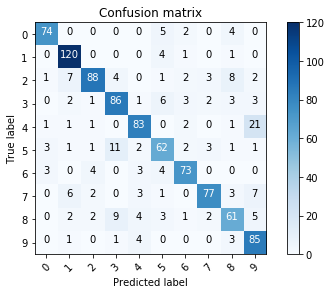

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# compute the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(10),
                      title='Confusion matrix')

plt.show()

In [18]:
# report the top 3 pairs with most (absolute number) incorrect classifications
for i,j,k in [(4,9,21),(5,3,11),(8,3,9)]:
    print('True Label: {}, Predicted Label: {}'.format(i,j))
    print('\tIncorrect Number of Classifications: {}'.format(k))

True Label: 4, Predicted Label: 9
	Incorrect Number of Classifications: 21
True Label: 5, Predicted Label: 3
	Incorrect Number of Classifications: 11
True Label: 8, Predicted Label: 3
	Incorrect Number of Classifications: 9


#### Question 8: Visualizing mistakes: Print two MNIST images from the test data that your classifier misclassified. Write both the true and predicted labels for both of these misclassified digits. (10 marks)

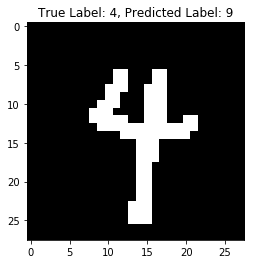

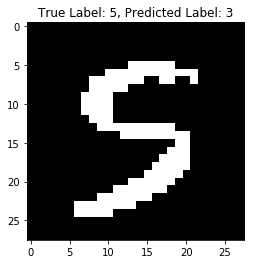

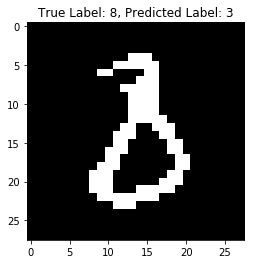

In [19]:
# print MNIST images from test data that were misclassified
for digit in [4,5,8]:
    
    # find the indices for the misclassified digits, and just select just one
    idx = y_test[(y_test[0]!=y_pred) & (y_test[0] == digit)].index
    idX_one = idx[14]

    # convert pixel array to image 
    pixels = np.array(X_test.iloc[idX_one], dtype='uint8')
    pixels = pixels.reshape((28, 28))
    
    # print MNIST true image with true and predicted labels
    plt.title('True Label: {}, Predicted Label: {}'.format(y_test[0][idX_one], y_pred[idX_one]))
    plt.imshow(pixels, cmap='gray')
    plt.show()

Now, we will implement Gaussian Mixture Model and Linear Discriminant Anal- ysis on the breast cancer data (sklearn.datasets.load breast cancer) available in sklean.datasets. Load the data and split it into train-validation-test (40-20-40 split). Don’t shuffle the data, otherwise your results will be different.

In [20]:
# load the data
breast_cancer = load_breast_cancer()
x = breast_cancer.data
y = breast_cancer.target

print(breast_cancer.DESCR)
print("-"*80)
print(x[0])
print(x.shape)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [21]:
# split data into train-validation-test (40-20-40)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, 
                                                    random_state = 3, shuffle = False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 1/3, 
                                                  random_state = 3, shuffle = False)

In [22]:
# verify the split of data is correct
print('train data is: {}%'.format(len(X_train)*100/len(x)))
print('validation data is: {}%'.format(len(X_val)*100/len(x)))
print('test data is: {}%'.format(len(X_test)*100/len(x)))

train data is: 39.894551845342704%
validation data is: 20.035149384885763%
test data is: 40.070298769771526%


#### Question 9: Implement Gaussian Mixture model on the data as shown in class. Tune the covariance type parameter on the validation data. Use the selected value to compute the test accuracy. As always, train the model on train+validation data to compute the test accuracy. (10 mark)

In [23]:
# use gaussian mixture model and tune covariance type parameter on validation data

covariance_params = ['full', 'tied', 'diag', 'spherical'] # type of covariance
for cov in covariance_params:
    
    # model
    clf = GaussianMixture(n_components = 2, covariance_type = cov)  
    clf.means_init = np.array([X_train[y_train == i].mean(axis = 0) for i in range(2)])

    # fit
    clf.fit(X_train, y_train)

    # predict
    pred = clf.predict(X_val)

    # evaluate
    print('covariance_type = {}'.format(cov))
    print ('\tvalidation data accuracy = ' + str(accuracy_score(y_val, pred)))

covariance_type = full
	validation data accuracy = 0.9122807017543859
covariance_type = tied
	validation data accuracy = 0.9035087719298246
covariance_type = diag
	validation data accuracy = 0.9210526315789473
covariance_type = spherical
	validation data accuracy = 0.9736842105263158


In [24]:
# use "spherical" covariance type (highest accuracy on val data) to compute the test accuracy

# combine train+validation
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# model
clf = GaussianMixture(n_components = 2, covariance_type = 'spherical')  
clf.means_init = np.array([X_train_val[y_train_val == i].mean(axis=0) for i in range(2)])

# fit
clf.fit(X_train_val, y_train_val)

# predict
pred = clf.predict(X_test)

# evaluate
print('covariance_type = {}'.format('spherical'))
print ('\ttest data accuracy = ' + str(accuracy_score(y_test, pred)))

covariance_type = spherical
	test data accuracy = 0.9385964912280702


#### Question 10: Apply Linear Discriminant Analysis model on the train+validation data and report the accuracy obtained on test data. Report the transformation matrix (w) along with the intercept. (5 mark)

In [25]:
# apply LDA on train+validation data and find test data accuracy

# intialize
clf = LinearDiscriminantAnalysis()

# train
clf.fit(X_train_val, y_train_val, )

# test
y_pred = clf.predict(X_test)

# print the accuracy
print ('test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

test accuracy = 0.9736842105263158


In [26]:
# transformation matrix and intercept
print('weight vector')
print(clf.coef_[0])

print('\nintercept')
print(clf.intercept_)

weight vector
[ 5.33168485e+00 -2.12956799e-01 -6.01033070e-01 -8.89253348e-03
 -5.44754548e+01  7.43535846e+01 -4.97920818e+00 -3.41702295e+01
  1.73163730e+01 -4.44714556e+01 -8.41409536e+00 -2.52828683e-01
  5.78531220e-01  1.05895668e-02 -2.80550309e+02 -2.62778874e+00
  4.25991726e+01 -1.67347238e+02  1.26610355e+01  2.01114643e+02
 -3.54374333e+00 -7.21909964e-02 -5.53734899e-02  2.39371964e-02
  1.38875560e+01  1.03981200e+00 -6.05644948e+00 -1.47646877e+01
 -1.62743163e+01 -8.04669707e+01]

intercept
[50.95842876]


### 6. Evaluating Classifiers

#### Question 11: Load sklearn’s digits dataset (sklearn.datasets.load digits) and take the last 1300 samples as your test set. Train a K-Nearest Neighbor (k=5, linf distance) model and then without using any scikit-learn method, report the final values for Specificity, Sensitivity, TPR, TNR, FNR, FPR, Precision and Recall for Digit 3 (this digit is a positive, everything else is a negative). (15 marks)

In [27]:
# read data
digits = load_digits()
x = digits.data
y = digits.target

print(digits.DESCR)
print("-"*80)
print(x[0])
print(x.shape)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [28]:
# define train and test datasets
X_train = x[:-1300]
y_train = y[:-1300]

X_test = x[-1300:]
y_test = y[-1300:]

# transform labels to binary, (+1 when digit is 3, -1 otherwise)
y_train = [1 if i == 3 else -1 for i in y_train]
y_test = [1 if i == 3 else -1 for i in y_test]

In [29]:
# use KNN classifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'chebyshev')

# use model to predict
model = classifier.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# report accuracy on test data
print('train data accuracy: {}'.format(accuracy_score(pred_train, y_train)))
print('test data accuracy: {}'.format(accuracy_score(pred_test, y_test)))

train data accuracy: 0.9959758551307847
test data accuracy: 0.9784615384615385


In [30]:
# report the final values for Specificity, Sensitivity, TPR, TNR, FNR, FPR, Precision and Recall 
#for Digit 3 (this digit is a positive, everything else is a negative)

# calculate confusion matrix TP, FP, TP, FP
TP = sum([i == j for i,j in zip(y_test, pred_test) if i == 1 and j == 1])
TN = sum([i == j for i,j in zip(y_test, pred_test) if i == -1 and j == -1])
FP = sum([i != j for i,j in zip(y_test, pred_test) if i == -1 and j == 1])
FN = sum([i != j for i,j in zip(y_test, pred_test) if i == 1 and j == -1])
P = sum([i == 1 for i in y_test])
N = sum([i == -1 for i in y_test])

# compute evaulation metrics and report them

print('Evaluation metrics for digit 3 on test data:')
print('\nTP = {}, TN = {}, FP = {}, FN = {}, P = {}, N = {}'.format(TP, TN, FP, FN, P, N))

print('\nFNR = {}'.format(FN / (TP + FN)))
print('FPR = {}'.format(FP / (TN + FP)))
print('Specificity or TNR = {}'.format(TN / (TN + FP)))
print('Sensitivity or TPR or Recall = {}'.format(TP / (TP + FN)))
print('Precision = {}'.format(TP / (TP + FP)))
print('Accuracy = {}'.format((TP + TN) / (P + N)))

Evaluation metrics for digit 3 on test data:

TP = 110, TN = 1162, FP = 8, FN = 20, P = 130, N = 1170

FNR = 0.15384615384615385
FPR = 0.006837606837606838
Specificity or TNR = 0.9931623931623932
Sensitivity or TPR or Recall = 0.8461538461538461
Precision = 0.9322033898305084
Accuracy = 0.9784615384615385


[[1162    8]
 [  20  110]]


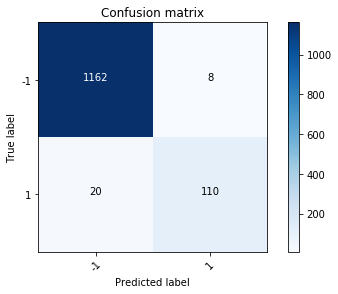

In [31]:
# Compute confusion matrix to confirm the result from above
cnf_matrix = confusion_matrix(y_test, pred_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1,1],
                      title='Confusion matrix')

plt.show()

### 7. Regression

An ablation experiment consists of removing one feature from an experiment, in order to assess the amount of additional information that feature provides above and beyond the others. For this section, we will use the diabetes dataset from scikit-learn’s toy datasets. Split the data into training and testing data as a 90-10 split with random state of 10.

In [32]:
# load diabetes dataset from scikit-learn's toy dataset
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

print(diabetes.DESCR)
print("-"*80)
print(x[0])
print(x.shape)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [33]:
# split data into train-test (90-10)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

In [34]:
# verify the split of data is correct
print('train data is: {}%'.format(len(X_train)*100/len(x)))
print('test data is: {}%'.format(len(X_test)*100/len(x)))

train data is: 89.81900452488688%
test data is: 10.180995475113122%


#### Question 12: Perform least squares regression on this dataset. Report the mean squared error and the mean absolute error on the test data. (5 marks)

In [35]:
# apply least squares regression on trainning data
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

In [36]:
# show rank and singular values
print(rank)
print(s)

10
[1.91278384 1.14679608 1.0475563  0.92375493 0.76298714 0.72860172
 0.69771063 0.62469455 0.26547165 0.08860349]


In [37]:
# make predictions on the testing data, lets see training error as well
y_train_pred = np.dot(X_train, theta) 
y_test_pred = np.dot(X_test, theta)

In [38]:
# report the mean squared error (MSE) on the test data
print('MSE for train data: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('MSE for test data: {}'.format(mean_squared_error(y_test, y_test_pred)))

MSE for train data: 25835.24616748783
MSE for test data: 28060.622559310537


In [39]:
# report the mean absolute error (MAE) on the test data
print('MAE for train data: {}'.format(mean_absolute_error(y_train, y_train_pred)))
print('MAE for test data: {}'.format(mean_absolute_error(y_test, y_test_pred)))

MAE for train data: 151.1654348701378
MAE for test data: 160.8439534334583


#### Question 13: Repeat the experiment from Question 9 for all possible values of ablation (i.e., removing the feature 1 only, then removing the feature 2 only, and so on). Report all MSEs. (10 marks)

In [40]:
# perform ablation experiment by removing every features one at a time
No_features = X_train.shape[1]
MSE_test_list = []
for f in range(No_features):

    # remove feature from training and test data
    feature_list = list(range(No_features)) 
    feature_list.remove(f) # remove only one features
    X_train_temp = X_train[:, feature_list]
    X_test_temp = X_test[:, feature_list]
    
    # least squares
    theta,residuals,rank,s = np.linalg.lstsq(X_train_temp, y_train)
    
    # make predictions
    y_train_pred = np.dot(X_train_temp, theta) 
    y_test_pred = np.dot(X_test_temp, theta)
    
    # report the mean squared error MSEs for train and test data
    print('Removing the feature {} only'.format(f))
    print('\tMSE for train data: {}'.format(mean_squared_error(y_train, y_train_pred)))
    MSE_test = mean_squared_error(y_test, y_test_pred)
    print('\tMSE for test data: {}'.format(MSE_test))
    MSE_test_list.append(MSE_test)

Removing the feature 0 only
	MSE for train data: 25835.456145729608
	MSE for test data: 28062.711822238078
Removing the feature 1 only
	MSE for train data: 25963.509410892115
	MSE for test data: 27936.317900620532
Removing the feature 2 only
	MSE for train data: 26117.78113034645
	MSE for test data: 29481.631561162365
Removing the feature 3 only
	MSE for train data: 25932.067639245513
	MSE for test data: 28762.573222191175
Removing the feature 4 only
	MSE for train data: 25837.2062805149
	MSE for test data: 28159.085211182188
Removing the feature 5 only
	MSE for train data: 25837.11626632769
	MSE for test data: 28123.775325632363
Removing the feature 6 only
	MSE for train data: 25849.17168725327
	MSE for test data: 27710.698098097313
Removing the feature 7 only
	MSE for train data: 25835.828130257145
	MSE for test data: 28006.79649746867
Removing the feature 8 only
	MSE for train data: 25920.1352209274
	MSE for test data: 28512.722055593065
Removing the feature 9 only
	MSE for train da

#### Question 14: Based on the MSE values obtained from Question 10, which fea- tures do you deem the most/least significant and why? (5 marks)

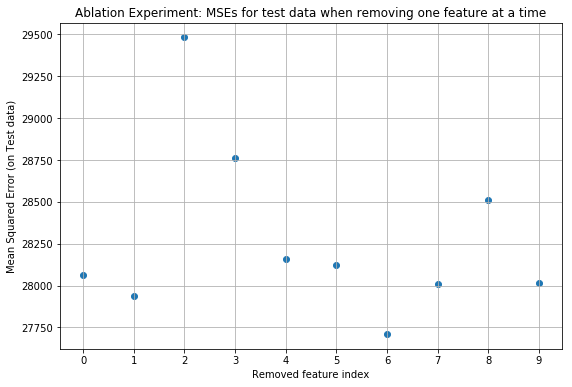

In [41]:
# plot the MSE values obtained
plt.figure(figsize = (9, 6))
plt.scatter(range(10), MSE_test_list)
plt.title('Ablation Experiment: MSEs for test data when removing one feature at a time')
plt.xlabel('Removed feature index')
plt.ylabel('Mean Squared Error (on Test data)')
plt.xticks(range(10))
plt.grid()
plt.show()

#### Answer (Q14):

As shown in the scatter plot above, feature 2 is the most significant because when removed the MSE goes up to ~29481, while on the other hand, feature 6 seems to be the least significant as the MSE drops to ~27710 when removed. These observations are based on testing data MSE values. 

### 8. Logistic Regression

For the following question use the wine dataset (wine original.csv). Download the file from Canvas (hw2 SP20.zip)

Download from: Canvas/Files/Lecture2/hw2 SP20.zip

In [42]:
# read wine dataset
wine_data = pd.read_csv('wine_original.csv')
wine_data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
# define features and labels 
x = wine_data.drop(['class'], axis = 1)
y = wine_data['class']

#### Question 15: Perform a 80-20 split using train test split on the data to ob- tain the train and the test data. Set random state = 3 while performing the train test split. Use Logistic Regression to classify the wines according to their cultivators. Tune the classifier using Lasso and Ridge regularization techniques under different values of ‘C’ using GridSearchCV. Clearly report the parameters of the best classifier and the accuracy on the test data. (10 marks).

In [44]:
# split data into train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

# verify the split of data is correct
print('train data is: {}%'.format(len(X_train)*100/len(x)))
print('test data is: {}%'.format(len(X_test)*100/len(x)))

train data is: 79.7752808988764%
test data is: 20.224719101123597%


In [45]:
# normalize X_train and X_test
mu_train = X_train.mean(axis = 0)
std_train = X_train.std(axis = 0)

X_trainNorm = X_train.apply(lambda x: (x-mu_train)/std_train, axis = 1)
X_testNorm = X_test.apply(lambda x: (x-mu_train)/std_train, axis = 1)

In [46]:
# use logistic regression to classify wines, perform GridSearchCV. Use normalized data

# tune with Lasso and Ridge regularization, and different values of C
parameters = { 'penalty': ['l1','l2'], 'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10]} # l1: Lasso, l2: Ridge Regression

# model
logreg = LogisticRegression()

# perform grid search
clf = GridSearchCV(logreg, parameters, verbose=True, n_jobs=-1)
clf.fit(X_trainNorm, y_train)

# get predictions
y_pred = clf.predict(X_testNorm)

# find train and test accuracy
accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_trainNorm), y_train)

# report parameters of the best classifier
print ('Selected Parameters: ', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Selected Parameters:  {'C': 1, 'penalty': 'l1'}
Training Accuracy = 1.0
Test Accuracy = 0.9444444444444444


[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    3.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.4s finished
